# TU257 - Assignment 1

#### Student 1: Guilherme
#### Student 2: Lohana Azevedo Rodrigues - D24126847 - (TU257)
#### Student 3: Rafael

#### Group Num= 3
#### Problem Set= 1 

####  **Portuguese Banking Marking Campaign -** The data set is related to a direct marketing campaign for a Portuguese banking institution. The bank conducts marketing campaigns and uses their call center to contact their customers using phone calls.
#### ***GOAL***: The purpose of this project is to identify customers who are most likely to subscribe to a term deposit account based on previous marketing campaigns.
#### https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

________________________________________________________

### Modules

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Step 1 - Importing the Data Set

In [23]:
#For this project we used the bank-additional data set with 4119 examples.
mkt = pd.read_csv('Data/bank-additional-full.csv', sep = ';')
mkt_raw = mkt  #keeping the original data untouched for comparisons at the end

## Step 2 - Data Exploration

##### I choose to use the sweetviz to explore my data. It is a good way to explore an unknown data base. The disvantage is ith the increase in the size of the data the time to generate the report also increases a lot.

In [3]:
#Let's start seeing the head and the shape of the data 
print('First 5 values\n')
mkt.head()

First 5 values



age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [10]:
# Using the Sweetviz module to generate a report that I will use to explore my data
analysis=sv.analyze(mkt)
analysis.show_html('mkt_analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report mkt_analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
#print('\n\n(Rows, Columns)')
#mkt.shape



(Rows, Columns)


(41188, 21)

In [8]:
#print('\n\nData information\n')
#mkt.info()



Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.i

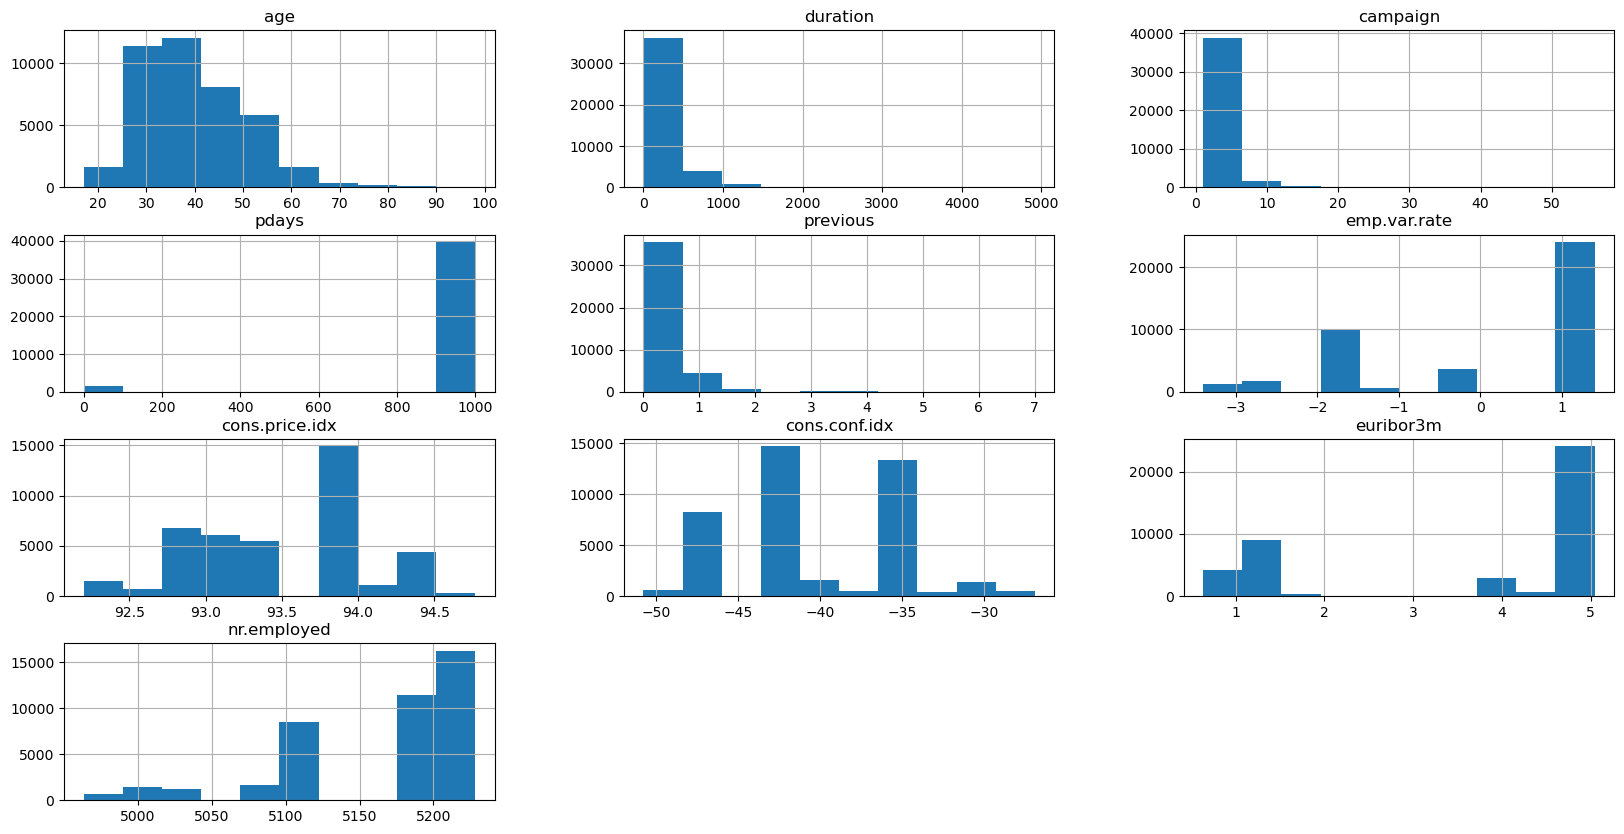

In [6]:
#mkt.hist();
#plt.gcf().set_size_inches(20, 10)
#plt.show()

## Step 3 - Data Insights Discovered sofar

- The dataset is a sample with a size of **41,188**, where **12** are duplicate records that will be removed.  
- It contains **21 variables**, of which **8 are numerical** and **13 are categorical**.  

## Variable Analysis  

### - ***Numerical Variables:***
### Age  
- **Type:** Continue  
- **Range:** 17 to 98  
- **Average:** 40  
- **Missing values:** None  
- **Observations:** The numbers appear to be real. No need for modifications (data cleaning).  

### Duration  
- **Type:** Continue  
- **Insights:**  
  - \>80% of values are above 135 seconds.
  - **Important note:** This attribute highly affects the output target y.  
  - If duration=0, then y='no'.  
  - **Since Duration is only known after a call, it should only be included for benchmarking and not for a realistic predictive model.**  

### Campaign  
- **Type:** Continue  
- **Definition:** Number of contacts performed during this campaign for this client (includes last contact).  
- **Insights:**  
  - 95% of clients were contacted up to 7 times.  
  - 48% were contacted only once.  

### Pdays  
- **Type:** Binary 
- **Definition:** Number of days since the client was last contacted from a previous campaign.  
- **Insights:**  
  - 96% of clients were last contacted 999 days ago.  
  - This variable does not explain much.  

### Previous  
- **Type:** Continue 
- **Definition:** Number of contacts before this campaign for this client.  
- **Insights:**  
  - 86% = 0 contacts.  
  - 14% = 1 or more contacts.
    
### Emp.var.rate  
- **Type:** Continue 
- **Definition:** Employment variation rate (quarterly frequency).  
- **Distinct categories:** 8  

### Cons.price.idx  
- **Type:** Continue  
- **Definition:** Monthly average consumer price index.  
- **Range:** Min 92.20, Max 94.77, Avg 93.58.  

### Cons.conf.idx  
- **Type:** Continue  
- **Definition:** Monthly average consumer confidence index.  
- **Range:** -26.9 to -50.8, Avg -40.5.  

### Euribor3m  
- **Type:** Continue 
- **Definition:** Three-month Euribor rate computed by the European Central Bank (ECB).  
- **Insights:** Correlation of 0.31 with the target variable.  

### Nr.employed  
- **Type:** Continue  
- **Definition:** Quarterly average of the total number of employed citizens.  
- **Insights:** Correlation of 0.65 with the target variable.


### - ***Categorical Variables:***
### Job  
- **Type:** Continue   
- **Distinct categories:** 12 (<1% is labeled as 'unknown')  
- **Correlation:** High correlation with Age, but we cannot determine someone’s job based on their age.  
- **Insights:** There is a 20% chance that Education explains this variable (the inverse makes more sense).  

### Marital  
- **Type:** Continue   
- **Distinct categories:** 4 (<1% is 'unknown')  
- **Correlation:** High correlation with Age.  

### Education  
- **Type:** Continue  
- **Distinct categories:** 8 (4% are 'unknown')  
- **Insights:**  
  - Categories below high school could be grouped, totaling 31%.  
  - Moderate correlation with Age.  
  - 23% chance that Job explains this variable (which makes sense).  

### Default  
- **Type:** Continue  
- **Categories:** 3 (<1% is "yes", 28% is 'unknown')  
- **Insights:** May not be useful for analysis since it does not provide much information.  

### Housing  
- **Type:** Continue   
- **Categories:** 3 (2% unknown)  

### Loan  
- **Type:** Continue   
- **Categories:** 3 (2% unknown)  
- **Insights:** Housing may explain this variable.  

### Contact  
- **Type:** Binary  
- **Categories:** 2  
- **Insights:** Likely not a good explanatory variable.  

### Month  
- **Type:** Continue   
- **Categories:** Jan to Dec  
- **Insights:** May + Jun + Aug = 65%  

### Day_of_week  
- **Type:** Continue   
- **Categories:** Mon to Fri  
- **Insights:** About 20% for each day.  
  

### Poutcome  
- **Type:** Continue  
- **Definition:** Outcome of the previous marketing campaign (`failure`, `nonexistent`, `success`).  
- **Insights:**  
  - Among the 14% who were previously contacted, 75.6% had a successful outcome.  

### Target Variable - Y  
- **Type:** Binary 
- **Definition:** Has the client subscribed to a term deposit?  
- **Distribution:** 89% = No  

#### *Correlation with Target Variable (Y)*  

| **Variable**         | **Correlation** |
|-----------------|------------|
| Duration       | **0.41** |
| Nr.employed    | **0.35** |
| Pdays          | **0.32** |
| Euribor3m      | **0.31** |
| Cons.price.idx | **0.14** |



## Step 4 - Data Clearning & Feature Engineering

### Removing duplicates

In [29]:
#This database has 12 duplicate records. Let's remove them!
mkt.drop_duplicates(inplace=True)

In [31]:
#I had before 41,188 rows. What about now? - 41176
mkt.shape

(41176, 21)

In [ ]:
#O que fazer com os 'unknown'? Excluo?

### Transforming object variables to numeric
##### Ps.: alguns algoritimos nao precisam dessa transformacao.

## 13 variables are categorical. Some models don't accept categorical variables. Let's transform them into numeric!
enconder = LabelEncoder()

for variable in mkt.columns:
    if mkt[variable].dtype == 'object':
        mkt[variable] = enconder.fit_transform(mkt[variable])

In [42]:
mkt.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

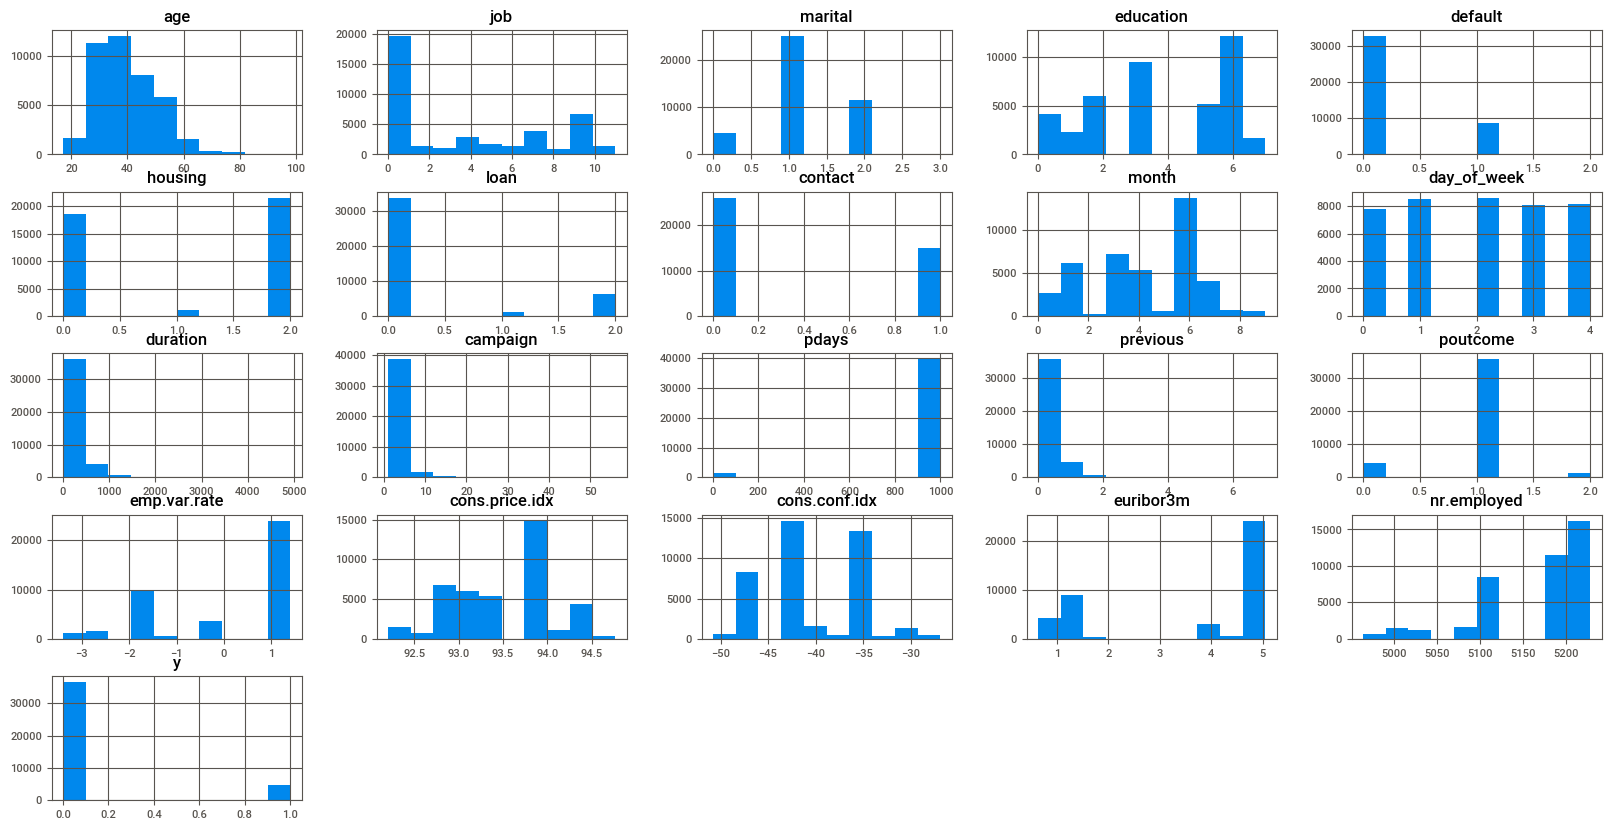

In [45]:
# Now I can plot the histogram of all variables
mkt.hist();
plt.gcf().set_size_inches(20, 10)
plt.show()

In [ ]:
#ps.: A relacao do meu alvo com a minha variavel tem que ser preferencialment linear. Tenho que prestar atencao nas variaveil continuas.

In [ ]:
# agrupar a variavel age em intervalos?
#Agrupar a variavel month com os meses que nao teve muita interacao?
#

## Step 5 - Data Preparation

## Step 6 - Creating the Models

## Step 7 - Evaluating the Models

## Step 8 - Recommendation & Findings